## ML Model Training

Import the relevant modules

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
df=pd.read_csv('combined_df.csv')
flairs=["Politics","Non-Political","AskIndia","Policy/Economy",'Business/Finance','Science/Technology','Sports','Food',
       'Photography','CAA-NRC-NPR','Coronavirus',"[R]ediquette"]

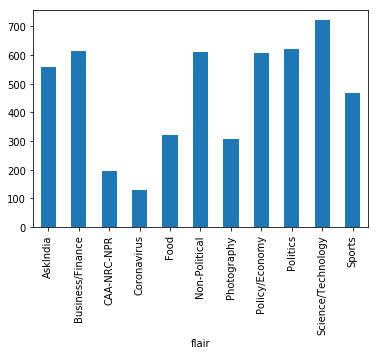

In [134]:
strip_df=pd.read_csv('stripped_data.csv')
strip_df.groupby('flair').count()['title'].plot(kind='bar')

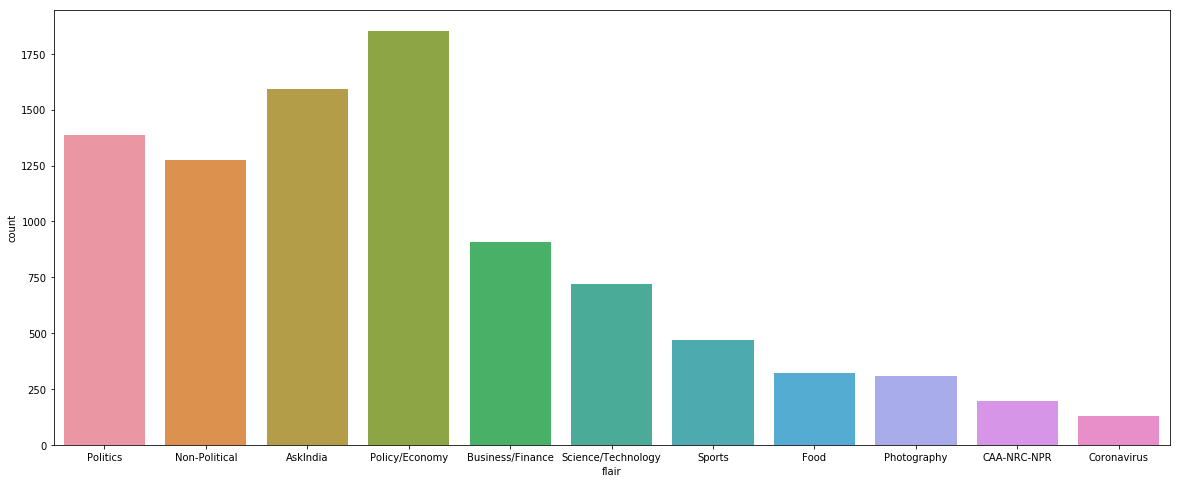

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(x='flair',data=df)

We have an unequal distribution of datapoints for each dataset. We will first try to train on this original dataset and then see if further data trimming is required. 

In [48]:
df.head()

,author,comment_length,comments,comms_num,flair,id,numerical_flair,score,stem_comments,stemmed_titles,timestamp,title,title_length,url,processed_url
0,chillinvillain122,2115,If there is anything positive in the fight ag...,73,Politics,futac9,0,196,anyth posit fight covid giv credit institut li...,pit commun polit party fuck stupid,2020-04-05 02:28:28,Pitting a community against a political party ...,64,https://www.reddit.com/r/india/comments/futac9...,www reddit com r india comments futac9 pitting...
1,chillinvillain122,4631,What an incredibly narrow minded person. Our ...,73,Politics,futac9,0,198,incred narrow mind person gre grandfath nat pe...,pit commun polit party fuck stupid,2020-04-05 02:28:28,Pitting a community against a political party ...,64,https://www.reddit.com/r/india/comments/futac9...,www reddit com r india comments futac9 pitting...
2,hipporama,5391,So the argument is that the DMs could have co...,67,Politics,fpaj1w,0,404,argu dms could command pol arm forc didnt dms ...,hit backlash post lack med gear doct go sil so...,2020-03-27 01:47:25,Hit by backlash over posts on lack of medical ...,242,https://theprint.in/india/hit-by-backlash-over...,theprint india hit backlash posts lack medical...
3,aaluinsonaout,3828,I tend to agree with her. After the first Del...,146,Politics,ff8sth,0,731,tend agr first delh shoot arnab goswam republ ...,new polit party gav ful front pag ad popul new...,2020-03-08 20:06:11,A new political party gave a full front page a...,85,https://i.redd.it/yjo9wpy38el41.jpg,redd yjo9wpy38el41 jpg
4,I_can_believe_that,2148,Except Indira all of them loved dissent. They...,51,Politics,fs887w,0,43,exceiv indir lov diss spin back didn’t sold go...,i’ve cury ind polit think good job polit,2020-03-31 20:29:29,"I’ve been curious, which Indian politicians do...",98,https://www.reddit.com/r/india/comments/fs887w...,www reddit com r india comments fs887w ive cur...


## Sec Stripped Data

This dataset containts approximately similar number of datapoints for each flair, with the relatively unpopular posts from the flairs removed

In [135]:
sec_strip=pd.read_csv('sec_strip_data.csv')

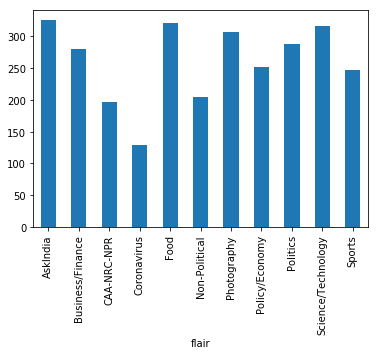

In [136]:
sec_strip.groupby('flair').count()['title'].plot(kind='bar')

In [194]:
model_eval=dict()
model_eval['Classifier']=[]
model_eval['Features']=[]
model_eval['macro_precision']=[]
model_eval['weighted_precision']=[]
model_eval['macro_recall']=[]
model_eval['weighted_recall']=[]
model_eval['macro_F1']=[]
model_eval['weighted_F1']=[]

## Logistic Regression Classifier

In [185]:
def logregclassifier(X,y):
    from sklearn.linear_model import LogisticRegression
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    logreg=Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                      ('clf',LogisticRegression(C=50,penalty='l2')) # l1 performed comparatively worse 
                     ])
    logreg.fit(X_train,y_train)
    predictions=logreg.predict(X_test)
    print("confusion matrix")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("Classification report ")
    print(classification_report(y_test,predictions))
    c_report=classification_report(y_test,predictions,output_dict=True)
    model_eval['Classifier'].append('Logistic Regression')
    model_eval['macro_precision'].append(c_report['macro avg']['precision'])
    model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
    model_eval['macro_recall'].append(c_report['macro avg']['recall'])
    model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
    model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
    model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

    '''#Using GridSearch CV
    param_grid = {'clf__C': [1,10,50,100,1000],
                  'clf__penalty': ['l1','l2']}
    print("using the grid search cv")
    grid = GridSearchCV(logreg, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score:",grid.best_score_)
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)'''

In [91]:
X=df['title_comments_stem']+df['processed_url']
y=df['flair']

In [92]:
logregclassifier(X,y)

confusion matrix
[[393  18   1   0   7  28   3  18  16   9   1]
 [ 21 155   0   0   0  10   0  55   5  11   0]
 [  4   0  48   0   0   0   1   9   4   0   0]
 [  1   0   0  29   1   2   0   0   1   0   0]
 [ 13   2   0   1  44  25   3   5   3   0   2]
 [ 23   4   0   0   2 285   9  11  36   4   4]
 [ 14   1   0   0   1  28  46   0   0   1   0]
 [ 12  43   0   0   1  14   3 413  32  13   1]
 [ 10   4   1   0   2  56   0  38 313   4   1]
 [ 25  18   0   0   0  22   3  48  10 101   2]
 [ 16   0   0   0   1   9   2   7   4   3  98]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.74      0.80      0.77       494
  Business/Finance       0.63      0.60      0.62       257
       CAA-NRC-NPR       0.96      0.73      0.83        66
       Coronavirus       0.97      0.85      0.91        34
              Food       0.75      0.45      0.56        98
     Non-Political       0.59      0.75      0.67       378
       Photography 

### Random Forest Model

In [186]:
def rfclassifier(X,y):
    from sklearn.ensemble import RandomForestClassifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    rf_reg=Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                      ('clf',RandomForestClassifier(max_depth=75,max_features='auto',n_estimators=500))#{'clf__max_depth': 75, 'clf__max_features': 'auto', 'clf__n_estimators': 500} 
                     ])
    rf_reg.fit(X_train,y_train)
    predictions=rf_reg.predict(X_test)
    print("confusion matrix")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("Classification report ")
    print(classification_report(y_test,predictions))
    c_report=classification_report(y_test,predictions,output_dict=True)
    model_eval['Classifier'].append('Random Forests')
    model_eval['macro_precision'].append(c_report['macro avg']['precision'])
    model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
    model_eval['macro_recall'].append(c_report['macro avg']['recall'])
    model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
    model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
    model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

    #Using GridSearch CV
    '''param_grid = {'clf__n_estimators': [500,100,50],
                  'clf__max_features': ['auto','sqrt','log2'],
                 'clf__max_depth':[5,15,50,75]
                 }
    print("using the grid search cv")
    grid = GridSearchCV(rf_reg, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score:",grid.best_score_)
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)'''

In [103]:
X=df['title_comments_stem']+df['processed_url']
y=df['flair']
rfclassifier(X,y)

confusion matrix
[[457   0   0   0   0  13   0  10  12   1   1]
 [ 37  61   0   0   0  17   0 137   3   2   0]
 [ 15   0  41   0   0   0   1   4   5   0   0]
 [  3   0   0  18   0   4   0   5   4   0   0]
 [ 26   1   0   0   9  34   0  20   6   0   2]
 [ 28   0   0   0   0 279   4  29  37   0   1]
 [ 17   0   0   0   0  27  34  13   0   0   0]
 [ 35   7   0   0   0  14   0 446  28   1   1]
 [ 13   0   1   0   0  56   0  60 297   1   1]
 [ 37   0   0   0   0  21   1 109   9  51   1]
 [ 22   0   0   0   1  20   2  27   6   0  62]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.66      0.93      0.77       494
  Business/Finance       0.88      0.24      0.37       257
       CAA-NRC-NPR       0.98      0.62      0.76        66
       Coronavirus       1.00      0.53      0.69        34
              Food       0.90      0.09      0.17        98
     Non-Political       0.58      0.74      0.65       378
       Photography 

## MLP Classifier

In [187]:
def mlpclassifier(X,y):
    from sklearn.neural_network import MLPClassifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    mlp_reg=Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                      ('clf',MLPClassifier(early_stopping=True,hidden_layer_sizes=(30,30,30),solver='lbfgs')) 
                     ])
    mlp_reg.fit(X_train,y_train)
    predictions=mlp_reg.predict(X_test)
    print("confusion matrix")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("Classification report ")
    print(classification_report(y_test,predictions))
    c_report=classification_report(y_test,predictions,output_dict=True)
    model_eval['Classifier'].append('Multi Layer Perceptron')
    model_eval['macro_precision'].append(c_report['macro avg']['precision'])
    model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
    model_eval['macro_recall'].append(c_report['macro avg']['recall'])
    model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
    model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
    model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

    #Using GridSearch CV
    """param_grid = {'clf__hidden_layer_sizes': [15,20,30],
                  'clf__solver': ['lbfgs','adam'],
                 'clf__learning_rate':['constant','adaptive']
                 }
    print("using the grid search cv")
    grid = GridSearchCV(mlp_reg, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score:",grid.best_score_)
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)
"""
    

In [60]:
X=df['title']
y=df['flair']
mlpclassifier(X,y)

confusion matrix
[[332  25   1   0   8  32  20  27  18  18  13]
 [ 23 142   0   0   3  11   2  59   9   8   0]
 [  0   0  56   1   0   2   0   3   4   0   0]
 [  1   0   0  28   3   0   0   1   0   1   0]
 [  9   2   0   4  38  17   4  10   6   3   5]
 [ 29   9   0   0   8 190  21  34  40  21  26]
 [ 11   3   1   0   9  10  42   2   7   1   5]
 [ 25  59   2   0   7  21   3 337  51  25   2]
 [ 25  15   2   0   7  63   2  44 249  16   6]
 [ 21  14   0   0   1  27   7  57  13  88   1]
 [ 13   2   0   0   8  24   5   6   7   4  71]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.68      0.67      0.68       494
  Business/Finance       0.52      0.55      0.54       257
       CAA-NRC-NPR       0.90      0.85      0.88        66
       Coronavirus       0.85      0.82      0.84        34
              Food       0.41      0.39      0.40        98
     Non-Political       0.48      0.50      0.49       378
       Photography 

### Training on stripped Data

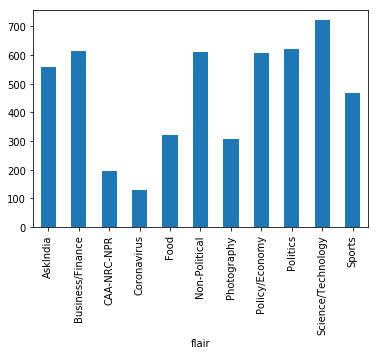

In [30]:
strip_df.groupby('flair').count()['title'].plot(kind='bar')

In [45]:
X=strip_df['stemmed_titles']+strip_df['processed_url']
y=strip_df['flair']
logregclassifier(X,y)

confusion matrix
[[236  11   0   0   0   5   1   1   3  10   1]
 [ 16 198   0   0   1  12   0  13   7  18   0]
 [  3   0  52   0   0   3   0   0   2   0   0]
 [  1   0   0  31   1   0   0   0   4   0   0]
 [ 18   4   0   1  48  12   1   0   2   5   2]
 [ 17  13   0   0   2 167   5   7  27   8   7]
 [ 12   0   0   0   1  27  41   0   1   0   1]
 [ 10  33   3   0   1   9   0 107  14  16   1]
 [  9   9   0   0   1  53   0  17 156  12   2]
 [ 29  24   0   0   5  15   0  21  10 117   4]
 [ 18   1   0   0   2   7   1   4   8   6 103]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.64      0.88      0.74       268
  Business/Finance       0.68      0.75      0.71       265
       CAA-NRC-NPR       0.95      0.87      0.90        60
       Coronavirus       0.97      0.84      0.90        37
              Food       0.77      0.52      0.62        93
     Non-Political       0.54      0.66      0.59       253
       Photography 

## Naive - Bayes Classifier

In [188]:
def nbclassifier(X,y):
    from sklearn.naive_bayes import MultinomialNB
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    nb_pipeline=Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                      ('clf',MultinomialNB(alpha=1))
                     ])
    nb_pipeline.fit(X_train,y_train)
    predictions=nb_pipeline.predict(X_test)
    print("confusion matrix")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("Classification report ")
    print(classification_report(y_test,predictions))
    c_report=classification_report(y_test,predictions,output_dict=True)
    model_eval['Classifier'].append('Naive Bayes')
    model_eval['macro_precision'].append(c_report['macro avg']['precision'])
    model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
    model_eval['macro_recall'].append(c_report['macro avg']['recall'])
    model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
    model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
    model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

    #Using GridSearch CV
    '''param_grid = {'clf__alpha': [1,2,10,5]}
    grid = GridSearchCV(nb_pipeline, param_grid, cv=5)
    grid.fit(X_train, y_train)

    print("using the grid search cv")
    grid = GridSearchCV(nb_pipeline, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score:",grid.best_score_)
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)'''

In [57]:
X=strip_df['stemmed_titles']+strip_df['processed_url']
y=strip_df['flair']
nbclassifier(X,y)

confusion matrix
[[237  16   0   0   0   7   0   0   4   4   0]
 [ 30 213   0   0   0   7   0   2   6   7   0]
 [ 12   4  16   0   0   4   0   1  23   0   0]
 [  2   9   0   0   0   2   0   1  21   2   0]
 [ 41  15   0   0   5  21   0   0   8   3   0]
 [ 31  26   0   0   0 142   0   2  43   6   3]
 [ 22   3   0   0   0  39  12   0   7   0   0]
 [ 17  68   3   0   0   8   0  59  32   7   0]
 [ 14  24   0   0   0  38   0   5 172   6   0]
 [ 54  55   0   0   0   5   0   3  17  91   0]
 [ 37  17   0   0   0   7   0   1  16   3  69]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.48      0.88      0.62       268
  Business/Finance       0.47      0.80      0.60       265
       CAA-NRC-NPR       0.84      0.27      0.41        60
       Coronavirus       0.00      0.00      0.00        37
              Food       1.00      0.05      0.10        93
     Non-Political       0.51      0.56      0.53       253
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## SVM Classifier

In [189]:
def svmclassifier(X,y):    
    from sklearn.linear_model import SGDClassifier
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
    svm_pipeline=Pipeline([('vect',CountVectorizer()),
                     ('tfidf',TfidfTransformer()),
                      ('clf',SGDClassifier(alpha=0.001,penalty='elasticnet'))
                     ])
    svm_pipeline.fit(X_train,y_train)
    predictions=svm_pipeline.predict(X_test)
    print("confusion matrix")
    print(confusion_matrix(y_test,predictions))
    print('\n')
    print("Classification report ")
    print(classification_report(y_test,predictions))
    c_report=classification_report(y_test,predictions,output_dict=True)
    model_eval['Classifier'].append('SVM')
    model_eval['macro_precision'].append(c_report['macro avg']['precision'])
    model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
    model_eval['macro_recall'].append(c_report['macro avg']['recall'])
    model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
    model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
    model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

    #Using GridSearch CV
    """param_grid = {'clf__alpha': [0.001,0.01,0.1,1]}
    grid = GridSearchCV(svm_pipeline, param_grid, cv=5)
    grid.fit(X_train, y_train)

    print("using the grid search cv")
    grid = GridSearchCV(svm_pipeline, param_grid, cv=5)
    grid.fit(X_train, y_train)
    print("Best cross-validation score:",grid.best_score_)
    print("Best parameters: ", grid.best_params_)
    print("Best estimator: ", grid.best_estimator_)"""

In [72]:
X=df['stemmed_titles']+df['processed_url']
y=df['flair']
svmclassifier(X,y)

confusion matrix
[[453   2   0   0   6   6   3  17   6   1   0]
 [ 65  71   0   0   0  10   0  96  10   4   1]
 [ 13   0  37   0   0   3   0   5   8   0   0]
 [  2   0   0  28   1   1   0   0   2   0   0]
 [ 25   2   0   0  47  19   0   5   0   0   0]
 [ 61   6   2   0   1 228   1  44  29   0   6]
 [ 15   1   1   0   1  37  33   1   2   0   0]
 [ 54  28   0   0   1  12   2 397  30   6   2]
 [ 37  10   4   2   2  65   0  73 228   3   5]
 [ 47  12   0   2   0  21   0  76  12  58   1]
 [ 23   1   0   0   0   6   0   9   6   0  95]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.57      0.92      0.70       494
  Business/Finance       0.53      0.28      0.36       257
       CAA-NRC-NPR       0.84      0.56      0.67        66
       Coronavirus       0.88      0.82      0.85        34
              Food       0.80      0.48      0.60        98
     Non-Political       0.56      0.60      0.58       378
       Photography 

## Testing the various models

The MLP model took lot of time to train and had low output scores, hence it was removed from further testing after initial runs

In [192]:
def test_models(X,y,features):
    print("TESTING THE  LOGISTIC REGRESSION MODEL ")
    model_eval['Features'].append(features)
    logregclassifier(X,y) #1
    print("\n TESTING THE RANDOM FORESTS MODEL \n")
    model_eval['Features'].append(features)
    rfclassifier(X,y) #2
    #print("\n TESTING THE MLP MODEL")
    #model_eval['Features'].append(features)
    #mlpclassifier(X,y) #3
    print("\n TESTING THE SVM MODEL ")
    model_eval['Features'].append(features)
    svmclassifier(X,y) #4
    print("\n TESTING THE NAIVE BAYES MODEL")
    model_eval['Features'].append(features)
    nbclassifier(X,y) #5

TESTING ON COMBINED DATA

In [183]:
strip_df.isna().sum()
strip_df=strip_df.drop(strip_df[strip_df['stemmed_titles'].isna()].index)
strip_df=strip_df.drop(strip_df[strip_df['title_comments_stem'].isna()].index)


In [195]:
X=strip_df['stemmed_titles']+strip_df['stem_comments']+strip_df['author']+strip_df['processed_url']
y=strip_df['flair']
test_models(X,y,'stemmed titles,stemmed comments,author,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[112  14   0   0   3   6   1   7   8  10   0]
 [ 15 131   0   0   4   6   1  21   6  20   1]
 [  2   0  57   0   0   1   1   2   3   1   1]
 [  1   0   1  23   2   0   0   0   1   0   0]
 [ 10   0   1   1  50  10   1   1   6   4   1]
 [  4   6   0   0   4 115   3   5  22   5   5]
 [  8   0   0   0   2  25  53   0   1   2   1]
 [  8  32   0   0   2   7   0 105  20  24   0]
 [  1   3   0   2   3  27   2  20 126   3   3]
 [ 20  14   0   0   2   9   2  15   5 140   2]
 [  9   0   0   0   3   8   2   0   3   2 112]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.59      0.70      0.64       161
  Business/Finance       0.66      0.64      0.65       205
       CAA-NRC-NPR       0.97      0.84      0.90        68
       Coronavirus       0.88      0.82      0.85        28
              Food       0.67      0.59      0.62        85
     Non-Political       0.54      0.68      0.60       169
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


TESTING ON TITLES + URL

In [197]:
X=df['stemmed_titles']+df['processed_url']
y=df['flair']
test_models(X,y,'stemmed_titles,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[437  15   0   0   3  15   1  11   8   4   1]
 [ 21 149   0   0   0  13   0  59   5   7   0]
 [  8   0  49   0   0   2   0   4   3   0   0]
 [  1   0   0  26   1   1   0   2   2   0   1]
 [ 19   2   0   1  47  12   1  10   1   4   1]
 [ 20   3   0   0   3 255  12  24  46   4   7]
 [ 14   5   0   0   1  35  36   1   3   0   0]
 [ 24  33   0   0   1  23   0 393  43  12   0]
 [ 20   8   0   0   0  68   4  52 272   5   1]
 [ 26  17   0   0   0  22   0  42  14 116   0]
 [ 16   1   0   0   0  13   2   4   2   6  91]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.72      0.88      0.79       495
  Business/Finance       0.64      0.59      0.61       254
       CAA-NRC-NPR       1.00      0.74      0.85        66
       Coronavirus       0.96      0.76      0.85        34
              Food       0.84      0.48      0.61        98
     Non-Political       0.56      0.68      0.61       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [198]:
X=df['title']+df['processed_url']
y=df['flair']
test_models(X,y,'title,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[442  12   0   0   3  15   0  12   5   4   2]
 [ 25 146   0   0   0  11   0  61   4   7   0]
 [  8   0  51   0   0   2   0   2   1   2   0]
 [  1   0   0  27   1   0   0   2   1   0   2]
 [ 18   3   0   3  46  13   0   8   2   4   1]
 [ 20   7   0   0   5 258  10  22  40   6   6]
 [ 13   3   0   0   2  32  40   2   3   0   0]
 [ 25  38   0   0   1  18   0 403  34  10   0]
 [ 18   7   0   0   0  61   3  49 287   5   0]
 [ 25  15   0   0   0  18   1  41  15 120   2]
 [ 18   3   0   0   0  14   1   7   4   2  86]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.72      0.89      0.80       495
  Business/Finance       0.62      0.57      0.60       254
       CAA-NRC-NPR       1.00      0.77      0.87        66
       Coronavirus       0.90      0.79      0.84        34
              Food       0.79      0.47      0.59        98
     Non-Political       0.58      0.69      0.63       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [199]:
X=strip_df['title']+strip_df['processed_url']
y=strip_df['flair']
test_models(X,y,'title,processed_url(reduced_data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[127   7   1   0   2   5   3   5   2   7   2]
 [ 17 142   0   0   2  10   0  15   4  15   0]
 [  3   0  59   0   0   0   0   3   3   0   0]
 [  1   0   0  25   0   0   0   0   1   0   1]
 [ 14   1   0   2  45  13   2   3   1   3   1]
 [  8   7   0   0   5 102   5   7  22   9   4]
 [  6   0   0   0   2  32  46   0   3   3   0]
 [  3  29   0   0   1   7   0 119  15  22   2]
 [  6   7   0   0   0  31   2  19 105  16   4]
 [ 20  16   0   0   2  15   0  22   6 124   4]
 [ 19   2   0   1   1  14   0   2   2   2  96]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.57      0.79      0.66       161
  Business/Finance       0.67      0.69      0.68       205
       CAA-NRC-NPR       0.98      0.87      0.92        68
       Coronavirus       0.89      0.89      0.89        28
              Food       0.75      0.53      0.62        85
     Non-Political       0.45      0.60      0.51       169
       Photography 

In [200]:
X=strip_df['title']+strip_df['processed_url']+strip_df['author']+strip_df['stem_comments']
y=strip_df['numerical_flair']
test_models(X,y,'title,processed_url,author,stemmed_comments(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[134  24   1  16   2   3   4   3   3   0   0]
 [ 22 118   3   4   4   6   5   5   2   0   0]
 [  9   6 110   6  16  10   0   3   1   0   0]
 [ 22   6   5 109  35  17   1   3   0   0   0]
 [  5   7  11  19 137  21   1   4   0   0   0]
 [  5   9  20  19  13 138   2   1   2   0   0]
 [  3   8  10   0   1   4 109   3   1   0   0]
 [  5   9  12   1   2   3   1  50   1   1   0]
 [  2  23   7   0   0   9   0   2  49   0   0]
 [  2   0   1   3   0   1   1   0   1  59   0]
 [  1   0   0   1   0   0   0   2   1   1  22]]


Classification report 
              precision    recall  f1-score   support

           0       0.64      0.71      0.67       190
           1       0.56      0.70      0.62       169
           2       0.61      0.68      0.65       161
           3       0.61      0.55      0.58       198
           4       0.65      0.67      0.66       205
           5       0.65      0.66      0.66       209
           6       0.88      0.78      0.83       139
       

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
sec_strip=pd.read_csv('sec_strip_data.csv')

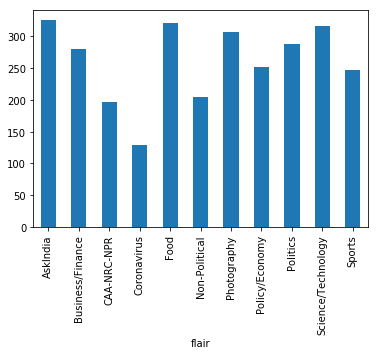

In [25]:
sec_strip.groupby('flair').count()['title'].plot(kind='bar')

In [201]:
X=sec_strip['title']+sec_strip['processed_url']+sec_strip['author']+sec_strip['stem_comments']
y=sec_strip['flair']
test_models(X,y,'title,processed_url,author,stemmed_comments(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[78  5  0  0  2  0  1  3  5  6  0]
 [ 8 54  0  0  2  2  2  5  1  8  0]
 [ 4  0 49  0  0  0  0  0  2  1  1]
 [ 0  0  0 27  3  0  0  0  2  0  1]
 [ 6  1  1  5 72  4  2  3  4  1  2]
 [ 1  2  0  0  1 35  7  0  8  6  2]
 [12  1  0  0  4  8 59  0  1  8  1]
 [ 6  9  0  0  2  2  1 50 14  7  1]
 [ 0  1  0  0  5  8  1  9 50  3  1]
 [ 5  8  0  0  0  1  3  5  1 65  0]
 [ 8  0  0  0  1  2  1  2  3  1 55]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.61      0.78      0.68       100
  Business/Finance       0.67      0.66      0.66        82
       CAA-NRC-NPR       0.98      0.86      0.92        57
       Coronavirus       0.84      0.82      0.83        33
              Food       0.78      0.71      0.75       101
     Non-Political       0.56      0.56      0.56        62
       Photography       0.77      0.63      0.69        94
    Policy/Economy       0.65      0.54      0.59        92
          Politics  

In [202]:
X=sec_strip['stemmed_titles']+sec_strip['stem_comments']+sec_strip['processed_url']
y=sec_strip['flair']
test_models(X,y,'stemmed_titles,stemmed_comments,processed_url(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[73  6  0  0  5  0  1  5  4  6  0]
 [ 8 52  0  0  1  2  4  4  1 10  0]
 [ 4  0 46  0  1  0  1  0  2  2  1]
 [ 0  0  0 28  2  1  0  0  2  0  0]
 [ 3  1  2  3 70  4  6  4  3  3  2]
 [ 1  2  0  0  1 35  8  0  9  5  1]
 [12  1  0  0  4  6 65  0  2  3  1]
 [ 6 10  1  0  1  1  1 52 13  7  0]
 [ 2  1  0  0  3  9  1 10 50  1  1]
 [ 6  6  0  1  0  1  6  5  1 62  0]
 [ 7  1  0  1  1  3  1  1  2  2 54]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.60      0.73      0.66       100
  Business/Finance       0.65      0.63      0.64        82
       CAA-NRC-NPR       0.94      0.81      0.87        57
       Coronavirus       0.85      0.85      0.85        33
              Food       0.79      0.69      0.74       101
     Non-Political       0.56      0.56      0.56        62
       Photography       0.69      0.69      0.69        94
    Policy/Economy       0.64      0.57      0.60        92
          Politics  

In [19]:
X=df['author']+df['stemmed_titles']+df['processed_url']+df['stem_comments']
y=df['flair']
test_models(X,y)

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[398  14   0   0   7  27   2  18  19   8   1]
 [ 22 150   0   0   0  10   0  63   2  10   0]
 [  7   0  48   0   0   0   0   7   4   0   0]
 [  1   0   0  25   1   2   0   2   3   0   0]
 [ 18   2   0   2  41  24   0   5   4   1   1]
 [ 29   4   0   0   3 286   6  12  30   4   4]
 [ 20   1   0   0   1  32  33   2   0   2   0]
 [ 18  39   0   0   1  14   0 416  32  11   1]
 [ 14   3   1   0   2  59   0  36 309   4   1]
 [ 34  14   0   0   0  23   1  51   8  96   2]
 [ 17   0   0   0   1  10   1   5   5   2  99]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.69      0.81      0.74       494
  Business/Finance       0.66      0.58      0.62       257
       CAA-NRC-NPR       0.98      0.73      0.83        66
       Coronavirus       0.93      0.74      0.82        34
              Food       0.72      0.42      0.53        98
     Non-Political       0.59      0.76      0.66       378
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
X=sec_strip['author']+sec_strip['stemmed_titles']+sec_strip['processed_url']+sec_strip['stem_comments']
y=sec_strip['flair']
test_models(X,y,'author,stemmed_titles,processed_url,stem_comments(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[74  5  0  0  5  0  1  5  4  6  0]
 [ 8 52  0  0  1  2  2  5  1 11  0]
 [ 6  0 45  0  0  0  1  0  3  1  1]
 [ 0  0  0 27  3  0  0  0  2  0  1]
 [ 4  0  1  3 71  4  4  5  4  3  2]
 [ 1  2  0  0  1 34  8  1  9  5  1]
 [12  1  0  0  4  9 60  1  2  4  1]
 [ 6  9  0  0  1  1  1 55 13  6  0]
 [ 1  1  0  0  3  9  1  9 52  1  1]
 [ 7  6  0  0  1  2  2  5  1 64  0]
 [ 7  1  0  1  1  3  1  1  2  1 55]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.59      0.74      0.65       100
  Business/Finance       0.68      0.63      0.65        82
       CAA-NRC-NPR       0.98      0.79      0.87        57
       Coronavirus       0.87      0.82      0.84        33
              Food       0.78      0.70      0.74       101
     Non-Political       0.53      0.55      0.54        62
       Photography       0.74      0.64      0.69        94
    Policy/Economy       0.63      0.60      0.61        92
          Politics  

In [204]:
X=df['author']+df['stemmed_titles']+df['processed_url']
y=df['flair']
test_models(X,y,'author,stemmed_titles,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[450  11   0   0   3  16   0   6   5   2   2]
 [ 25 142   0   0   0  13   0  61   4   9   0]
 [ 11   0  47   0   0   2   0   2   3   1   0]
 [  1   0   0  25   1   2   0   2   3   0   0]
 [ 22   2   0   4  38  14   1  10   1   4   2]
 [ 29   3   0   0   4 258  11  27  34   1   7]
 [ 14   2   0   0   1  38  35   1   3   1   0]
 [ 30  33   0   0   1  26   0 384  42  12   1]
 [ 23   8   0   0   0  77   0  53 262   7   0]
 [ 27  16   0   0   0  25   0  45   9 114   1]
 [ 19   3   0   0   0  12   1   5   4   5  86]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.69      0.91      0.79       495
  Business/Finance       0.65      0.56      0.60       254
       CAA-NRC-NPR       1.00      0.71      0.83        66
       Coronavirus       0.86      0.74      0.79        34
              Food       0.79      0.39      0.52        98
     Non-Political       0.53      0.69      0.60       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Testing after removing common occurring words

In [205]:
X=strip_df['title_comments_stem']+strip_df['processed_url']
y=strip_df['flair']
test_models(X,y,'title-comments-combined,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[110  15   0   0   3   4   1  10   6  11   1]
 [ 14 129   0   0   4   8   0  21   8  20   1]
 [  2   0  57   0   0   1   1   1   4   1   1]
 [  1   0   1  23   2   0   0   0   1   0   0]
 [  7   0   1   1  51  11   1   2   6   4   1]
 [  3   6   0   0   3 113   5   7  23   4   5]
 [  7   0   0   0   1  26  55   0   1   1   1]
 [  8  35   0   0   2   8   0 107  19  19   0]
 [  1   3   0   2   3  26   2  19 128   3   3]
 [ 19  13   0   0   2   8   2  13   7 143   2]
 [  9   0   0   0   3   8   2   0   3   3 111]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.61      0.68      0.64       161
  Business/Finance       0.64      0.63      0.64       205
       CAA-NRC-NPR       0.97      0.84      0.90        68
       Coronavirus       0.88      0.82      0.85        28
              Food       0.69      0.60      0.64        85
     Non-Political       0.53      0.67      0.59       169
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [206]:
X=df['author']+df['title_comments_stem']+df['processed_url']
y=df['flair']
test_models(X,y,'author,title-comments-combined,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[403  18   0   0   7  22   1  18  14   9   3]
 [ 28 150   0   0   0  11   0  55   5   5   0]
 [  6   0  48   0   0   0   1   7   4   0   0]
 [  1   0   0  25   1   2   0   1   4   0   0]
 [ 19   2   0   2  46  12   0   7   7   2   1]
 [ 19   2   0   0   5 275   9  13  43   3   5]
 [ 16   0   0   0   2  29  46   1   0   1   0]
 [ 18  50   0   0   2  18   2 395  33  11   0]
 [ 11   5   1   0   1  47   3  24 331   5   2]
 [ 30  17   0   0   0  27   2  42   8 108   3]
 [ 14   2   0   0   1   7   2   6   2   3  98]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.71      0.81      0.76       495
  Business/Finance       0.61      0.59      0.60       254
       CAA-NRC-NPR       0.98      0.73      0.83        66
       Coronavirus       0.93      0.74      0.82        34
              Food       0.71      0.47      0.56        98
     Non-Political       0.61      0.74      0.67       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
X=strip_df['title_comments_stem']+strip_df['processed_url']+strip_df['author']
y=strip_df['flair']
test_models(X,y)

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[123  14   0   0   4   5   1   9   8  11   0]
 [ 13 125   0   0   3  12   0  20   6  24   0]
 [  2   0  59   0   0   2   0   1   3   0   1]
 [  1   0   1  22   1   0   0   1   2   0   0]
 [ 14   2   1   1  52   5   1   1   4   9   1]
 [  4   4   0   0   9 121   5   4  16   4   1]
 [  7   0   0   0   1  22  52   0   0   3   0]
 [  6  26   1   0   1   6   0 110  23  17   1]
 [  2   3   0   2   2  21   0  16 129   6   1]
 [ 19  13   0   0   1  13   0  12   5 140   4]
 [  9   0   0   0   3   9   1   0   3   5 117]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.61      0.70      0.66       175
  Business/Finance       0.67      0.62      0.64       203
       CAA-NRC-NPR       0.95      0.87      0.91        68
       Coronavirus       0.88      0.79      0.83        28
              Food       0.68      0.57      0.62        91
     Non-Political       0.56      0.72      0.63       168
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
df=df.drop(df[df['stemmed_titles'].isna()].index)

In [207]:
X=df['stemmed_titles']+df['processed_url']
y=df['flair']
test_models(X,y,'stemmed_titles,processed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[437  15   0   0   3  15   1  11   8   4   1]
 [ 21 149   0   0   0  13   0  59   5   7   0]
 [  8   0  49   0   0   2   0   4   3   0   0]
 [  1   0   0  26   1   1   0   2   2   0   1]
 [ 19   2   0   1  47  12   1  10   1   4   1]
 [ 20   3   0   0   3 255  12  24  46   4   7]
 [ 14   5   0   0   1  35  36   1   3   0   0]
 [ 24  33   0   0   1  23   0 393  43  12   0]
 [ 20   8   0   0   0  68   4  52 272   5   1]
 [ 26  17   0   0   0  22   0  42  14 116   0]
 [ 16   1   0   0   0  13   2   4   2   6  91]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.72      0.88      0.79       495
  Business/Finance       0.64      0.59      0.61       254
       CAA-NRC-NPR       1.00      0.74      0.85        66
       Coronavirus       0.96      0.76      0.85        34
              Food       0.84      0.48      0.61        98
     Non-Political       0.56      0.68      0.61       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [79]:
i=strip_df[strip_df['stemmed_titles'].isna()].index
strip_df=strip_df.drop(i)

In [208]:
X=strip_df['stemmed_titles']
y=strip_df['flair']
test_models(X,y,'stemmed_titles(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[ 79  24   0   0   4  16   4   8   9  15   2]
 [ 19 131   0   0   3   5   0  16   4  25   2]
 [  0   0  59   0   0   0   0   4   4   1   0]
 [  0   0   0  24   0   0   1   1   1   1   0]
 [  4   3   0   2  50  12   0   5   2   5   2]
 [ 17   5   0   0   7  73   9   9  21  19   9]
 [  5   0   0   0   1  24  48   4   5   5   0]
 [  6  23   0   0   1  14   0 112  20  20   2]
 [  8  11   0   0   3  19   5  19 103  15   7]
 [ 23  18   0   0   3  15   1  13  17 115   4]
 [  8   3   0   1   2  13   0   5   8   3  96]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.47      0.49      0.48       161
  Business/Finance       0.60      0.64      0.62       205
       CAA-NRC-NPR       1.00      0.87      0.93        68
       Coronavirus       0.89      0.86      0.87        28
              Food       0.68      0.59      0.63        85
     Non-Political       0.38      0.43      0.41       169
       Photography 

In [105]:
df2=pd.read_csv('combined_df.csv')

In [209]:
X=df2['title_comments_stem']+df2['processed_url']
y=df2['flair']
test_models(X,y,'title-comments-combined,processed_url(reduced data)')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[393  18   1   0   6  28   3  18  16  10   1]
 [ 21 155   0   0   0  10   0  55   5  11   0]
 [  3   0  48   0   0   0   1  10   4   0   0]
 [  1   0   0  29   1   2   0   0   1   0   0]
 [ 14   2   0   1  43  25   3   5   3   0   2]
 [ 25   4   0   0   2 283   9  11  36   4   4]
 [ 14   1   0   0   1  28  45   0   0   2   0]
 [ 13  43   0   0   0  14   3 412  33  13   1]
 [ 10   4   1   0   2  56   0  38 313   4   1]
 [ 26  19   0   0   0  22   3  47  10 100   2]
 [ 15   0   0   0   1   9   2   7   4   4  98]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.73      0.80      0.76       494
  Business/Finance       0.63      0.60      0.62       257
       CAA-NRC-NPR       0.96      0.73      0.83        66
       Coronavirus       0.97      0.85      0.91        34
              Food       0.77      0.44      0.56        98
     Non-Political       0.59      0.75      0.66       378
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [107]:
strip2=pd.read_csv('stripped_data.csv')


In [111]:
indexes=strip2[strip2['title_comments_stem'].isna()].index
strip2=strip2.drop(indexes)

In [112]:
X=strip2['title_comments_stem']+strip2['processed_url']
y=strip2['flair']
test_models(X,y)

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[110  15   0   0   3   4   1  10   6  11   1]
 [ 14 129   0   0   4   8   0  21   8  20   1]
 [  2   0  57   0   0   1   1   1   4   1   1]
 [  1   0   1  23   2   0   0   0   1   0   0]
 [  7   0   1   1  51  11   1   2   6   4   1]
 [  3   6   0   0   3 113   5   7  23   4   5]
 [  7   0   0   0   1  26  55   0   1   1   1]
 [  8  35   0   0   2   8   0 107  19  19   0]
 [  1   3   0   2   3  26   2  19 128   3   3]
 [ 19  13   0   0   2   8   2  13   7 143   2]
 [  9   0   0   0   3   8   2   0   3   3 111]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.61      0.68      0.64       161
  Business/Finance       0.64      0.63      0.64       205
       CAA-NRC-NPR       0.97      0.84      0.90        68
       Coronavirus       0.88      0.82      0.85        28
              Food       0.69      0.60      0.64        85
     Non-Political       0.53      0.67      0.59       169
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
df=df.drop(df[df['stemmed_titles'].isna()].index)

In [210]:
X=df['title_comments_stem']+df['stemmed_url']
y=df['flair']
test_models(X,y,'title-comments-combined,stemmed_url')

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[391  21   0   0   7  24   1  20  18  10   3]
 [ 26 148   0   0   0  11   0  59   5   5   0]
 [  6   0  48   0   0   0   1   7   4   0   0]
 [  1   0   0  28   2   1   0   0   2   0   0]
 [ 19   2   0   1  47  11   0   7   7   2   2]
 [ 18   3   0   0   4 277   9  12  43   4   4]
 [ 14   0   0   0   2  30  45   1   1   1   1]
 [ 14  51   0   0   2  19   1 395  34  13   0]
 [ 13   5   1   0   1  49   3  23 329   5   1]
 [ 32  18   0   0   0  27   1  41  10 105   3]
 [ 13   1   0   0   1   8   2   5   2   3 100]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.71      0.79      0.75       495
  Business/Finance       0.59      0.58      0.59       254
       CAA-NRC-NPR       0.98      0.73      0.83        66
       Coronavirus       0.97      0.82      0.89        34
              Food       0.71      0.48      0.57        98
     Non-Political       0.61      0.74      0.67       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [144]:
X=df['title_comments_stem']+df['processed_url']
y=df['flair']
test_models(X,y)

TESTING THE  LOGISTIC REGRESSION MODEL 


C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


confusion matrix
[[395  21   0   0   7  21   1  21  16  10   3]
 [ 26 150   0   0   0  11   0  58   6   3   0]
 [  5   0  48   0   0   0   1   8   4   0   0]
 [  1   0   0  29   1   2   0   0   1   0   0]
 [ 19   2   0   1  47  11   0   8   7   1   2]
 [ 19   2   0   0   4 277   9  11  44   4   4]
 [ 15   0   0   0   2  30  46   1   0   1   0]
 [ 16  49   0   0   2  18   1 400  33  10   0]
 [ 13   5   1   0   1  48   3  22 331   5   1]
 [ 32  17   0   0   0  24   1  42   9 109   3]
 [ 13   2   0   0   1   6   2   5   2   4 100]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.71      0.80      0.75       495
  Business/Finance       0.60      0.59      0.60       254
       CAA-NRC-NPR       0.98      0.73      0.83        66
       Coronavirus       0.97      0.85      0.91        34
              Food       0.72      0.48      0.58        98
     Non-Political       0.62      0.74      0.67       374
       Photography 

C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\mihee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [216]:
X=df['title_comments_stem']+df['processed_url']
y=df['flair']
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
logreg=Pipeline([('vect',CountVectorizer()),
                 ('tfidf',TfidfTransformer()),
                  ('clf',LogisticRegression(C=50,penalty='l2')) # l1 performed comparatively worse 
                 ])
logreg.fit(X_train,y_train)
predictions=logreg.predict(X_test)
print("confusion matrix")
print(confusion_matrix(y_test,predictions))
print('\n')
print("Classification report ")
c_report=classification_report(y_test,predictions,output_dict=True)
print(classification_report(y_test,predictions))
model_eval['Classifier'].append('Logistic Regression')
model_eval['Features'].append('title-comments-combined,processed_url')
model_eval['macro_precision'].append(c_report['macro avg']['precision'])
model_eval['weighted_precision'].append(c_report['weighted avg']['precision'])
model_eval['macro_recall'].append(c_report['macro avg']['recall'])
model_eval['weighted_recall'].append(c_report['weighted avg']['recall'])
model_eval['macro_F1'].append(c_report['macro avg']['f1-score'])
model_eval['weighted_F1'].append(c_report['weighted avg']['f1-score'])

confusion matrix
[[395  21   0   0   7  21   1  21  16  10   3]
 [ 26 150   0   0   0  11   0  58   6   3   0]
 [  5   0  48   0   0   0   1   8   4   0   0]
 [  1   0   0  29   1   2   0   0   1   0   0]
 [ 19   2   0   1  47  11   0   8   7   1   2]
 [ 19   2   0   0   4 277   9  11  44   4   4]
 [ 15   0   0   0   2  30  46   1   0   1   0]
 [ 16  49   0   0   2  18   1 400  33  10   0]
 [ 13   5   1   0   1  48   3  22 331   5   1]
 [ 32  17   0   0   0  24   1  42   9 109   3]
 [ 13   2   0   0   1   6   2   5   2   4 100]]


Classification report 
                    precision    recall  f1-score   support

          AskIndia       0.71      0.80      0.75       495
  Business/Finance       0.60      0.59      0.60       254
       CAA-NRC-NPR       0.98      0.73      0.83        66
       Coronavirus       0.97      0.85      0.91        34
              Food       0.72      0.48      0.58        98
     Non-Political       0.62      0.74      0.67       374
       Photography 

In [2]:
model_scores=pd.DataFrame(model_eval)

NameError: name 'model_eval' is not defined

In [218]:
model_scores

,Classifier,Features,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_F1,weighted_F1
0,Logistic Regression,"stemmed titles,stemmed comments,author,process...",0.716193,0.673877,0.682564,0.663212,0.695358,0.665187
1,Random Forests,"stemmed titles,stemmed comments,author,process...",0.726807,0.678591,0.629294,0.636658,0.650195,0.634279
2,SVM,"stemmed titles,stemmed comments,author,process...",0.657419,0.631799,0.666914,0.630829,0.657376,0.627530
3,Naive Bayes,"stemmed titles,stemmed comments,author,process...",0.652677,0.643724,0.381748,0.475389,0.384859,0.459289
4,Logistic Regression,"stemmed_titles,processed_url",0.756557,0.692444,0.641448,0.681107,0.683297,0.677236
...,...,...,...,...,...,...,...,...
56,Logistic Regression,"title-comments-combined,stemmed_url",0.753595,0.702837,0.664808,0.696396,0.698462,0.692964
57,Random Forests,"title-comments-combined,stemmed_url",0.788428,0.705252,0.532992,0.642883,0.577779,0.614166
58,SVM,"title-comments-combined,stemmed_url",0.685392,0.649274,0.580407,0.623225,0.585467,0.600136
59,Naive Bayes,"title-comments-combined,stemmed_url",0.626991,0.613298,0.287789,0.504914,0.258079,0.419273


In [213]:
model_scores[model_scores['Classifier']=='Logistic Regression']

,Classifier,Features,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_F1,weighted_F1
0,Logistic Regression,"stemmed titles,stemmed comments,author,process...",0.716193,0.673877,0.682564,0.663212,0.695358,0.665187
4,Logistic Regression,"stemmed_titles,processed_url",0.756557,0.692444,0.641448,0.681107,0.683297,0.677236
8,Logistic Regression,"title,processed_url",0.759476,0.703984,0.653407,0.693848,0.691811,0.689511
12,Logistic Regression,"title,processed_url(reduced_data)",0.710380,0.661636,0.664778,0.641192,0.678758,0.643907
16,Logistic Regression,"title,processed_url,author,stemmed_comments(re...",0.730383,0.680959,0.684016,0.670337,0.701703,0.671860
20,Logistic Regression,"title,processed_url,author,stemmed_comments(re...",0.716776,0.703106,0.699816,0.690698,0.704599,0.692756
24,Logistic Regression,"stemmed_titles,stemmed_comments,processed_url(...",0.708707,0.693821,0.692658,0.682558,0.697906,0.685264
28,Logistic Regression,"author,stemmed_titles,processed_url,stem_comme...",0.715449,0.699682,0.692422,0.684884,0.700244,0.688520
32,Logistic Regression,"author,stemmed_titles,processed_url",0.745966,0.685779,0.619530,0.670186,0.661366,0.664371
36,Logistic Regression,"title-comments-combined,processed_url",0.718002,0.675297,0.685044,0.665155,0.698104,0.667402


In [219]:
model_scores.to_csv('model_scores.csv',index=False)

## Saving the model

In [220]:
import joblib

In [222]:
filename='trained_pipeline.sav'

In [223]:
joblib.dump(logreg,filename)

['trained_pipeline.sav']

In [224]:
import pickle

In [226]:
pickle.dump(logreg, open('trained_pipeline_pickle.sav', 'wb'))

In [4]:
scores_table=pd.read_csv('model_scores.csv')

In [9]:
scores_table.groupby('Classifier').max()

,Features,macro_precision,weighted_precision,macro_recall,weighted_recall,macro_F1,weighted_F1
Classifier,,,,,,,
Logistic Regression,"title-comments-combined,stemmed_url",0.761437,0.710313,0.699816,0.703313,0.706261,0.699969
Naive Bayes,"title-comments-combined,stemmed_url",0.744211,0.718472,0.484840,0.566062,0.501684,0.554048
Random Forests,"title-comments-combined,stemmed_url",0.812470,0.713627,0.647955,0.646288,0.664368,0.643226
SVM,"title-comments-combined,stemmed_url",0.715938,0.656746,0.674903,0.660465,0.663760,0.653127
